In [2]:
import pandas as pd
import hddm

/anaconda3/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [3]:
data = hddm.load_csv('demoData.csv')

In [4]:
data.head(10)

,subj_idx,stim,rt,response,theta,dbs,conf
0,0,LL,1.210,1.0,0.656275,1,HC
1,0,WL,1.630,1.0,-0.327889,1,LC
2,0,WW,1.030,1.0,-0.480285,1,HC
3,0,WL,2.770,1.0,1.927427,1,LC
4,0,WW,1.140,0.0,-0.213236,1,HC
5,0,WL,1.150,1.0,-0.436204,1,LC
6,0,LL,2.000,1.0,-0.274479,1,HC
7,0,WL,1.040,0.0,0.666957,1,LC
8,0,WW,0.857,1.0,0.118617,1,HC
9,0,WL,1.500,0.0,0.823626,1,LC


In [5]:
model = hddm.HDDM(data)

In [6]:
model.find_starting_values()

/anaconda3/lib/python2.7/site-packages/scipy/optimize/optimize.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/anaconda3/lib/python2.7/site-packages/scipy/optimize/optimize.py:1935: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1


In [7]:
model.sample(2000, burn=20)

 [-----------------100%-----------------] 2000 of 2000 complete in 80.7 sec

Plotting a


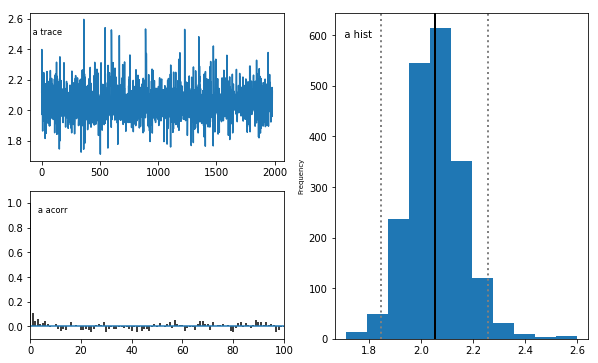

In [8]:
model.plot_posteriors('a')

Plotting a_std


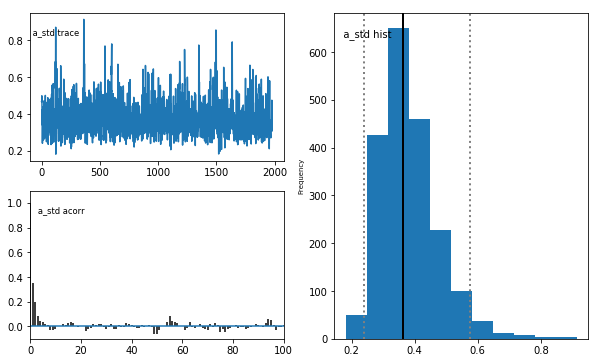

In [9]:
model.plot_posteriors('a_std')

In [16]:
models = []
for index in range(4):
    m = hddm.HDDM(data)
    m.find_starting_values()
    m.sample(5000, burn=20)
    models.append(m)

 [-----------------100%-----------------] 5000 of 5000 complete in 242.8 sec

In [17]:
model.print_stats()

               mean         std       2.5q        25q        50q        75q     97.5q       mc err
a           2.05964    0.105792    1.84957    1.99291    2.05906    2.12762   2.26979   0.00238352
a_std      0.382988   0.0905446   0.249752   0.316869   0.367865   0.431763  0.609556   0.00292247
a_subj.0     2.3828   0.0602713    2.26945    2.34068    2.38156    2.42255   2.50518   0.00143879
a_subj.1    2.13174   0.0627551    2.01381    2.08612    2.13096    2.17453   2.26179   0.00201568
a_subj.2    1.74769   0.0485164    1.65305    1.71544     1.7473    1.78053   1.84706   0.00145935
a_subj.3    2.25241   0.0641493    2.13339    2.20853    2.25102    2.29197   2.38808   0.00172502
a_subj.4    1.49011   0.0476253    1.39691    1.45815    1.48845    1.52125   1.58658   0.00156556
a_subj.5    1.76967   0.0487075     1.6755    1.73541    1.76937    1.80107   1.86959   0.00164859
a_subj.6    1.61215   0.0458146    1.52525     1.5803    1.61111    1.64165   1.70151   0.00151915
a_subj.7  

# Split by stimulus type

In [19]:
m_stim = hddm.HDDM(data, depends_on = {'v': 'stim'})

In [20]:
m_stim.find_starting_values()

In [22]:
m_stim.sample(2000, burn=20)

 [-----------------100%-----------------] 2000 of 2000 complete in 120.8 sec

In [27]:
v_WW, v_WL, v_LL = m_stim.nodes_db.node[['v(WW)', 'v(WL)', 'v(LL)']]

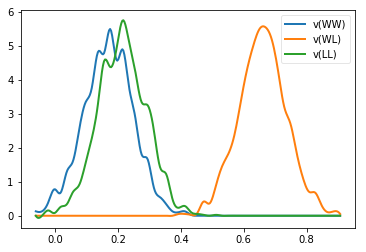

In [28]:
hddm.analyze.plot_posterior_nodes([v_WW, v_WL, v_LL])

# Fitting Regression Models

In [10]:
m_reg = hddm.HDDMRegressor(data[data.dbs == 0],
                           "a ~ theta:C(conf, Treatment('LC'))",
                           depends_on={'v': 'stim'})

Adding these covariates:
['a_Intercept', "a_theta:C(conf, Treatment('LC'))[HC]", "a_theta:C(conf, Treatment('LC'))[LC]"]


In [11]:
m_reg.sample(5000, burn=200)

 [-----------------100%-----------------] 5001 of 5000 complete in 10696.0 sec

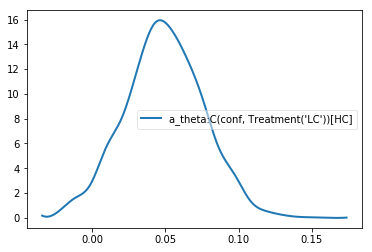

In [33]:
a_theta = m_reg.nodes_db.node["a_theta:C(conf, Treatment('LC'))[HC]"]
hddm.analyze.plot_posterior_nodes([a_theta], bins=20)

In [34]:
print("P(a_theta < 0)", (a_theta.trace() < 0).mean())

('P(a_theta < 0)', 0.028541666666666667)
